데이콘 _ 학습 플랫폼 이용자 구독 갱신 예측 해커톤: https://dacon.io/competitions/official/236179/overview/description
* 참가 목적 : 
1. 데이콘의 대회 플로우 익히기
2. 현재까지 배운 내용(데이터 전처리/시각화) 이해도 높이기
3. 머신러닝 / 딥러닝 발 담그기

# 머신러닝 플로우
1. 문제 정의
2. 데이터 전처리: 데이터 탐색(EDA), 데이터 정제(Data Cleaning)
3. 학습
4. 평가

# 1. 문제 정의
: 구독 갱신 여부를 0,1 로 분류하는 이진 분류 문제

# 2. 데이터 전처리

## 데이터 준비

In [2]:
# 데이터 준비
import pandas as pd

data_info = pd.read_csv('./data_base/data_info.csv')
data_info


,column,description
0,user_id,사용자의 고유 식별자
1,subscription_duration,사용자가 서비스에 가입한 기간 (월)
2,recent_login_time,사용자가 마지막으로 로그인한 시간 (일)
3,average_login_time,사용자의 일반적인 로그인 시간
4,average_time_per_learning_session,각 학습 세션에 소요된 평균 시간 (분)
5,monthly_active_learning_days,월간 활동적인 학습 일수
6,total_completed_courses,완료한 총 코스 수
7,recent_learning_achievement,최근 학습 성취도
8,abandoned_learning_sessions,중단된 학습 세션 수
9,community_engagement_level,커뮤니티 참여도


In [3]:
train = pd.read_csv('./data_base/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [4]:
train.describe()
# subscription_duration, recent_login_time, average_login_time -> 시간 데이터
# average_time_per_learning_Session의 경우 75% 다음이 503, 이상치같아보인다
# monthly_activve_learning_days -> 일 단위 데이터

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


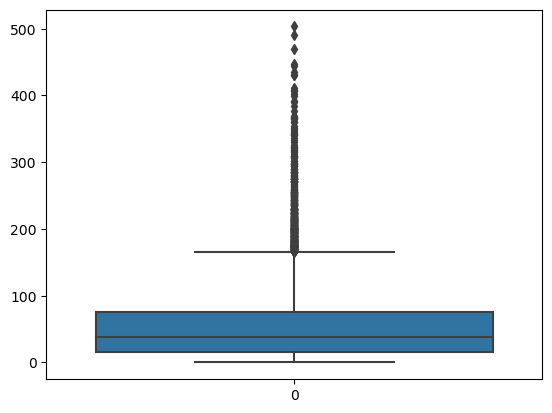

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(train['average_time_per_learning_session'])
plt.show()

### train셋과 test셋이 같은 칼럼으로 이루어져 있기 때문에 우선 train셋에 전처리를 완료한 후 test셋에 같은 전처리를 적용할 예정
__to do:__
* 범주형 데이터 숫자형으로 변환
* 숫자형 데이터들 스케일링(?)

In [5]:
train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


### 기본 정보 탐색

In [11]:
# 범주형 칼럼 값 확인
print(train['preferred_difficulty_level'].unique())
print(train['subscription_type'].unique())

['Low' 'Medium' 'High']
['Basic' 'Premium']


In [12]:
# 범주형 칼럼 값 정수형 숫자로 변환
def level_num(x):
    if x == 'Low':
        x = 0
    elif x == 'Medium':
        x = 1
    elif x == 'High':
        x = 2
    return x
        
def type_num(x):
    if x == 'Basic':
        x = 0
    elif x == 'Premium':
        x = 1
    return x

##### 아래처럼 apply 써서 숫자로 바꿔줬는데 그거 안하고 그냥 LabelEncoder 써도 됨 호호,,,

In [13]:
train['preferred_difficulty_level'] = train['preferred_difficulty_level'].apply(level_num)
train['subscription_type'] = train['subscription_type'].apply(type_num)
train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,0,0,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,0,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,1,1,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,0,0,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,1,0,3,0,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  int64  
 11  subscription_type                  10000 non-null  int6

#### 기본 boxplot 그려보기

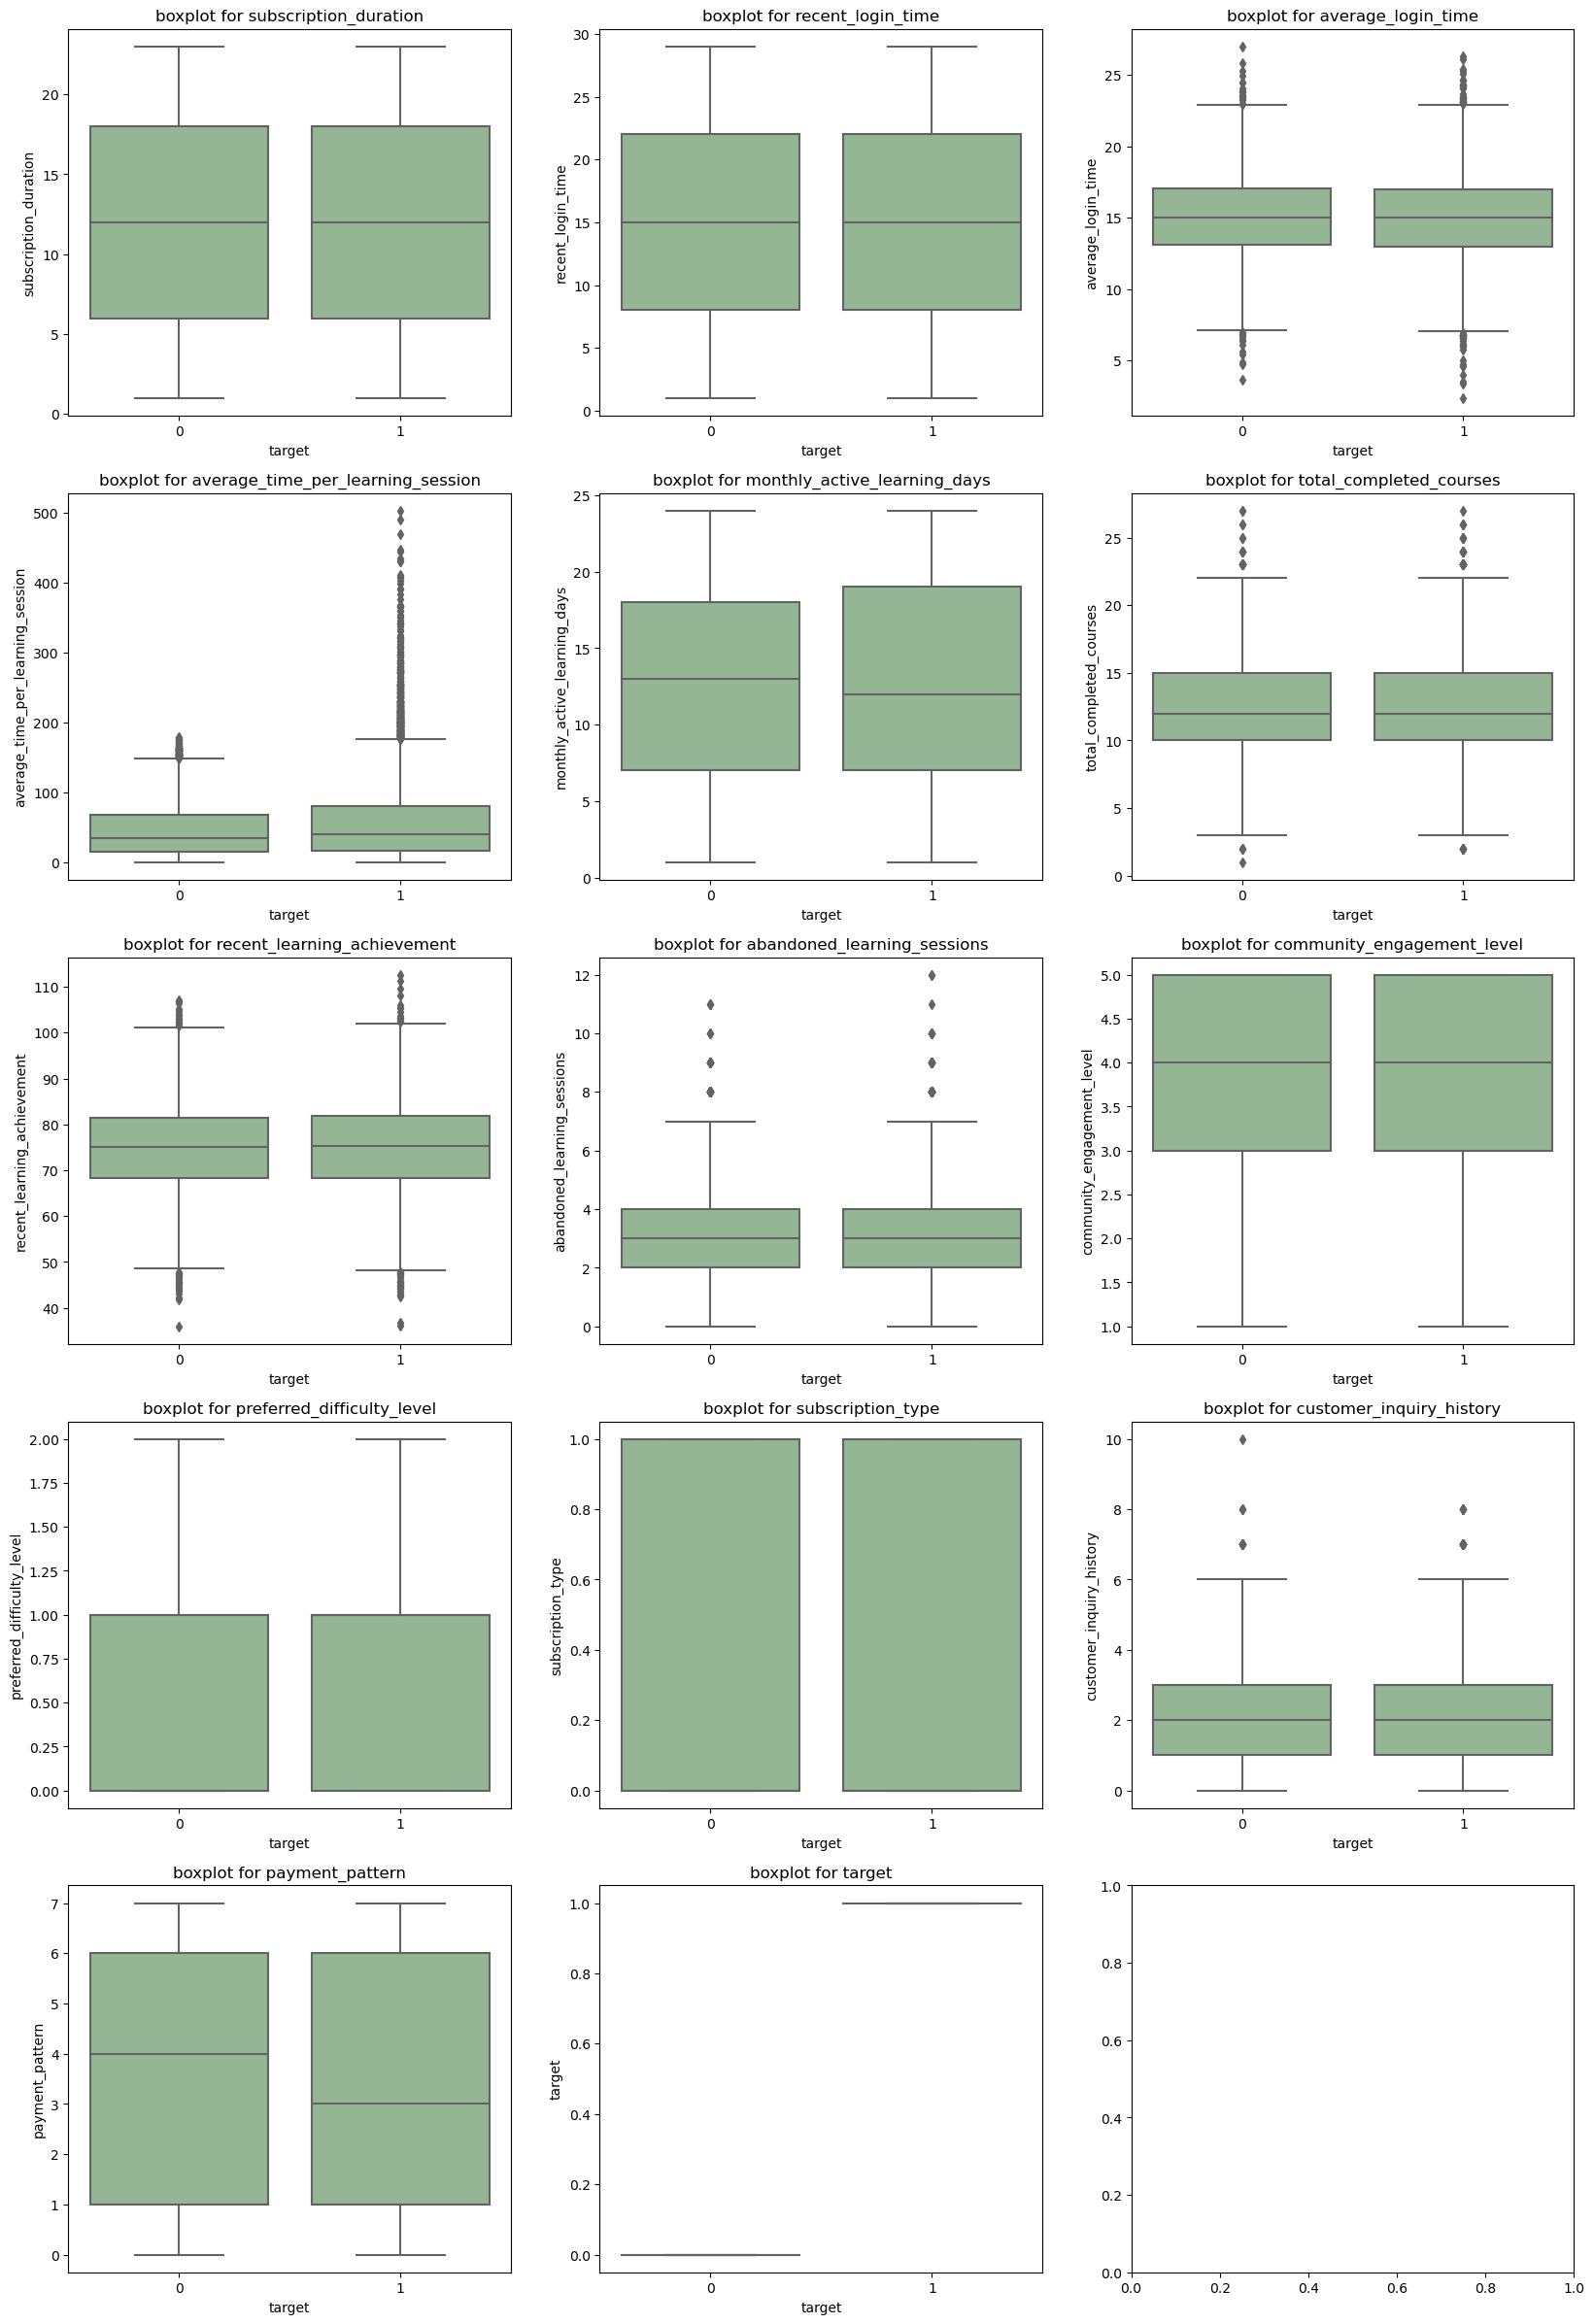

<Figure size 640x480 with 0 Axes>

In [24]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(5,3, figsize = (20,30))

for idx,col in enumerate(train.columns[1:15]):
    
    row_index = idx // 3
    col_index = idx % 3

    sns.boxplot(x = train['target'],y = train[col], color = 'darkseagreen', ax = ax[row_index,col_index])
    ax[row_index,col_index].set_title('boxplot for %s' % col)
plt.show()

plt.tight_layout(pad=5)
plt.subplots_adjust(wspace=0, hspace=5)

In [29]:
# 타겟에 따라 차이를 보이는 칼럼
# average_time_per_learning_session, monthly_active_learning_days, recent_learning_achievement, payment_pattern

#### 상관계수 분석

In [30]:
train.columns

Index(['user_id', 'subscription_duration', 'recent_login_time',
       'average_login_time', 'average_time_per_learning_session',
       'monthly_active_learning_days', 'total_completed_courses',
       'recent_learning_achievement', 'abandoned_learning_sessions',
       'community_engagement_level', 'preferred_difficulty_level',
       'subscription_type', 'customer_inquiry_history', 'payment_pattern',
       'target'],
      dtype='object')

In [33]:
# 

train2 = train[['average_time_per_learning_session','monthly_active_learning_days','recent_learning_achievement','payment_pattern','target']]
train2.head()

,average_time_per_learning_session,monthly_active_learning_days,recent_learning_achievement,payment_pattern,target
0,8.427187,18,68.360455,5,0
1,72.646087,16,97.567322,6,1
2,21.774492,13,94.358763,7,1
3,42.659066,19,70.153228,0,1
4,30.744287,19,81.917908,0,1


In [40]:
test2 = pd.read_csv('./data_base/test.csv')
test2 = test2[['average_time_per_learning_session','monthly_active_learning_days','recent_learning_achievement','payment_pattern']]
test2.head()

,average_time_per_learning_session,monthly_active_learning_days,recent_learning_achievement,payment_pattern
0,7.047243,19,82.074557,7
1,24.583327,10,80.546040,4
2,1.707616,9,73.676957,3
3,21.391389,12,63.314635,5
4,18.126987,8,55.899647,3


# to do
1. groupby
2. 필요해보이는 칼럼 정리
3. 널값 정리
4. 범주화

# 머신러닝

In [42]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y_train2 = train2['target']
X_train2 = train2.drop('target',axis=1)

train_X,test_X,train_y,test_y = train_test_split(X_train2,y_train2,
                                               test_size=0.2,random_state=11)


dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(random_state=11)
    
dt_clf.fit(train_X,train_y)
rf_clf.fit(train_X,train_y)
lr_clf.fit(train_X,train_y)
                        
accuracy_dt = accuracy_score(dt_clf.predict(test_X),test_y)
accuracy_rf = accuracy_score(rf_clf.predict(test_X),test_y)
accuracy_lr = accuracy_score(lr_clf.predict(test_X),test_y)



In [43]:
print(accuracy_dt)
print(accuracy_rf)
print(accuracy_lr)

0.5515
0.5775
0.6255


In [51]:
print(accuracy_dt)
print(accuracy_rf)
print(accuracy_lr)

0.5655
0.5995
0.6255
